# NATURAL LANGUAGE PROCESSING 

## SENTIMENT ANALYSIS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/Users/rohitsrivastava/Documents/Research/Natural-language-processing-sentiment-analysis/Data"))

# Any results you write to the current directory are saved as output.

['amazon_alexa.tsv', '.ipynb_checkpoints']


In [3]:
# Example text reviews
text_reviews = [
    "This is a positive review.\n",
    "Another positive review.\n",
    "A negative review with some criticism.\n"
]

# Using rstrip() and list comprehension to remove trailing whitespace and get a list of text reviews
clean_reviews = [review.rstrip() for review in text_reviews]

# Print the clean reviews
print(clean_reviews)

['This is a positive review.', 'Another positive review.', 'A negative review with some criticism.']


In [4]:
df_review = [line.rstrip() for line in open('/Users/rohitsrivastava/Documents/Research/Natural-language-processing-sentiment-analysis/Data/amazon_alexa.tsv')]
print (len(df_review))

3151


In [5]:
import pandas
df_review = pandas.read_csv('/Users/rohitsrivastava/Documents/Research/Natural-language-processing-sentiment-analysis/Data/amazon_alexa.tsv', sep='\t')
df_review.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


**Basic Exploratory Data Analysis**
Let's check out some of the stats with some plots and the built-in methods in pandas!

In [6]:
df_review.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df_review.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

Making a new column to detect how long the text messages are:

In [8]:
# Assuming 'verified_reviews' column contains strings and possibly NaN values
# Use the str.len() method to get the length of each string, handling NaN values gracefully
df_review['length'] = df_review['verified_reviews'].str.len()

# Display the DataFrame with the new 'length' column
print(df_review.head())


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  length  
0                                      Love my Echo!         1    13.0  
1                                          Loved it!         1     9.0  
2  Sometimes while playing a game, you can answer...         1   195.0  
3  I have had a lot of fun with this thing. My 4 ...         1   172.0  
4                                              Music         1     5.0  


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Frequency'>

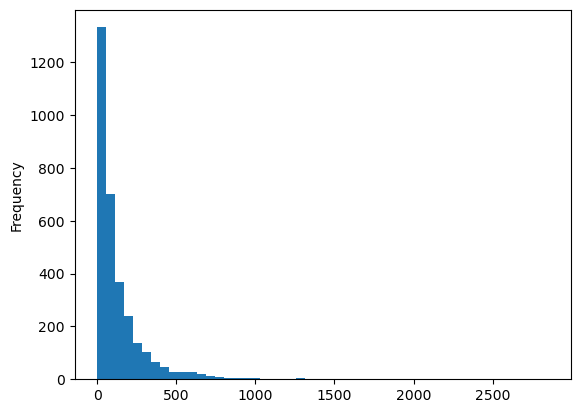

In [10]:
df_review['length'].plot(bins=50, kind='hist')

Finding out the Maximum length review

In [11]:
df_review.length.describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

Wow! 2851 characters long review, let's use masking to find this message:



In [12]:
df_review[df_review['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

**Looks like we have some sort of Essay writing review! Now let's focus back on the idea of trying to see if review length is a distinguishing feature between positive and negative review:**

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

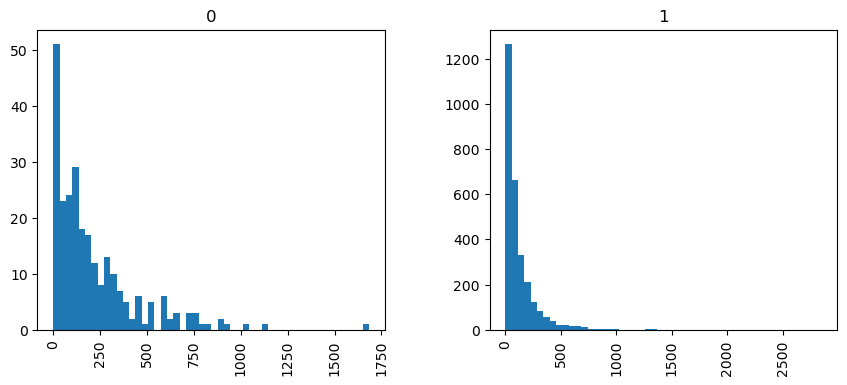

In [13]:
df_review.hist(column='length', by='feedback', bins=50,figsize=(10,4))

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Importing the dataset
dataset = pd.read_csv('/Users/rohitsrivastava/Documents/Research/Natural-language-processing-sentiment-analysis/Data/amazon_alexa.tsv', delimiter = '\t', quoting = 3)


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Check for NaN values and replace them with empty strings
dataset['verified_reviews'] = dataset['verified_reviews'].fillna('')

corpus = []
for review in dataset['verified_reviews']:
    # Apply regular expression to clean the text
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    # Remove stopwords and apply stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)


In [17]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [19]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
cm

array([[ 21,  33],
       [  1, 575]])

In [23]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [24]:
# Applying SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)
svm_report = classification_report(y_test, svm_y_pred)

In [25]:
# Applying Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)
nb_report = classification_report(y_test, nb_y_pred)

In [26]:
# Comparing Classification Reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.39      0.55        54
           1       0.95      1.00      0.97       576

    accuracy                           0.95       630
   macro avg       0.95      0.69      0.76       630
weighted avg       0.95      0.95      0.94       630



In [27]:
print("\nSVM Classification Report:")
print(svm_report)



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.87      0.73      0.78       630
weighted avg       0.94      0.94      0.94       630



In [28]:
print("\nNaive Bayes Classification Report:")
print(nb_report)



Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        54
           1       0.95      0.98      0.97       576

    accuracy                           0.94       630
   macro avg       0.84      0.71      0.76       630
weighted avg       0.93      0.94      0.93       630



## THE HIGHEST ACCURACY ACHIEVED IS USING RAINFOREST CLASSIFIER  